In [1]:
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df['target']= iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [8]:
df0 = df[:50]
df1 = df[50:100]
df2=df[100:]

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

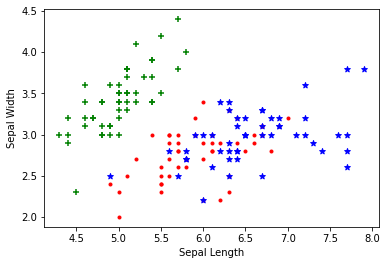

In [10]:
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker = '+')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker = '.')
plt.scatter(df2['sepal length (cm)'], df2['sepal width (cm)'], color='blue', marker = '*')

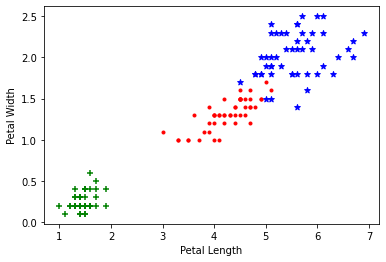

In [11]:
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.scatter(df0['petal length (cm)'], df0['petal width (cm)'], color='green', marker = '+')
plt.scatter(df1['petal length (cm)'], df1['petal width (cm)'], color='red', marker = '.')
plt.scatter(df2['petal length (cm)'], df2['petal width (cm)'], color='blue', marker = '*')

In [12]:
X = df.drop(['target'], axis = 'columns')
y= df['target']

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [14]:
len(X_train)

120

# Creating k neighbor classifier

In [15]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
knn.score(X_train, y_train)

0.95

In [18]:
knn.score(X_test, y_test)

1.0

In [19]:
knn5 = KNeighborsClassifier(n_neighbors=5)

In [20]:
knn5.fit(X_train, y_train)

KNeighborsClassifier()

In [21]:
knn5.score(X_train, y_train)

0.9583333333333334

In [22]:
knn5.score(X_test, y_test)

1.0

# Confusion Matrix

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

Text(33.0, 0.5, 'Observed')

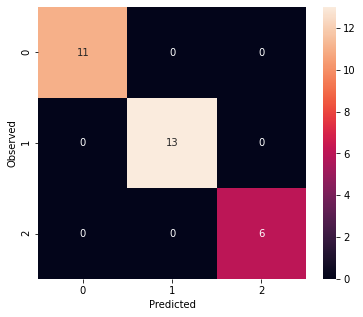

In [25]:
import seaborn as sn
plt.figure(figsize=(6,5))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Observed')

# Classification Report

In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

